# Contoh Aplikasi Komputasi Al-jabar Linear

## Page Rank

Algoritma PageRank atau algoritma Google diperkenalkan oleh Lary Page, salah satu pendiri Google. Ini pertama kali digunakan untuk menentukan peringkat halaman web di mesin pencari Google. Saat ini, semakin banyak digunakan di berbagai bidang, misalnya dalam menentukan peringkat pengguna di media sosial.  

di sini kita akan melakukan page ranking menggunakan algoritma pagerank  

web dapat di representasikan sebagai graph (graph merupah struktur data yang di representasikan oleh node dan edge) berarah node mewakili halaman web sedangkan edge mewakili hubungan antara dua node atau halaman web  

perhatikan graph di bawah

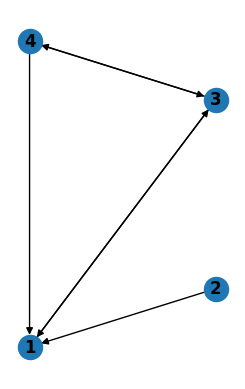

In [63]:
import networkx as nx
import matplotlib.pyplot as plt


DG = nx.DiGraph()
DG.add_weighted_edges_from([(3, 1, 1), (1, 3, 1), (2, 1, 1),  (4, 1, 1), (4,3, 1), (3, 4, 1)])
DG.out_degree(2, weight='weight')
subax2 = plt.subplot(122)
nx.draw_shell(DG, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

$$
r_j = \Sigma_{i}^{j} \frac{r_i}{degreeout_{r_i}}
$$  

dimana $r_{i}$ adalah skor dari node $i$ dan $degreeout_{r_i}$ derajat keluarnya.  

dari graph di atas di dapatkan persamaan  

$r_1 = \frac{r_2}{1} + \frac{r_3}{2} + \frac{r_4}{2}$  
$r_2 = 0$  
$r_3 = \frac{r_1}{1}  + \frac{4}{2}$    
$r_4 = \frac{r_3}{2}$  
  
  

  
Bentuk Matrix dari persamaan di atas:  
  
$
A = \begin{bmatrix}
    0 & 1 & 1/2 & 1/2 \\
    0 & 0 & 0 & 0 \\
    1 & 0 & 0 & 1/2 \\
    0 & 0 & 1/2 & 0
\end{bmatrix}
$   
  
$
V_0 = \begin{bmatrix}
    0.25 \\
    0.25 \\
    0.25 \\
    0.25
\end{bmatrix}
$  
  
$
V_1 = AV_0 = \begin{bmatrix}
    0.5 \\
    0 \\
    0.375 \\
    0.125
\end{bmatrix}
$  

Mencari selisih antara v1 dan v0  
$
    V_1 - V_0 = \begin{bmatrix}
        0.25 \\
        -0.25 \\
        0.125 \\
        -0.125
    \end{bmatrix}
$  
  
Mencari nilai convergence kita akan menetapkan nilai toleransinya 0.5 jika nilai convergence nya di bawah 0.5 maka kita tidak akan mencari vbaru selanjutnya jika nilai convergence nya di atas 0.5 maka kita akan mencari nilai vbaru selanjutnya  
  
$25^2 + (-0.25)^2 + 0.125^2 + (-0.125)^2$  
$= 0.0625 + 0.0625 + 0.015625 + 0.015625$    
$= 0.15625$    

di karenakan 0.15625 lebih kecil dari 0.5 maka kita berhenti  
  
dan kita dapat mengurutkan ranking page nya berdasarkan V_1 jika nilai nya makin tinggi maka makin berpengaruh  

$
V_1 =  \begin{bmatrix}
    0.5 \\
    0 \\
    0.375 \\
    0.125
\end{bmatrix}
$

Jadi urutan ranking dari halaman halaman web di atas adalah  

urutan pertama adalah = r1  
urutan kedua adalah = r3  
urutan ketuga adlah = r4  
dan urutan terakhir adalah = r2



In [76]:
# KAL
import numpy as np

# data seperti di contoh di atas
A = np.array([[0, 1, 1/2, 1/2], [0,0,0, 0],[1, 0 ,0, 1/2], [0, 0, 1/2, 0]])
Av0 = np.array([[0.25], [0.25], [0.25], [0.25]])

# data yang berbeda
B = np.array([[0, 0, 1, 1/2], [1/3, 0, 0, 0], [1/3, 1/2, 0, 1/2], [1/3, 1/2, 0, 0]])
Bv0 = np.array([[0.25], [0.25], [0.25], [0.25]])


def kaliMatrik(A, vlama):
  # mengkalikan matrix dengan vlama
  v = A@vlama
  return v

def convergen(vlama, v, toleransi):
    # menghitung selisih antara vbaru dan vlama
    selisih = v - vlama
    # menghitung nilai convergen nya
    convergen = 0
    for i in selisih:
      convergen += i[0]**2
    # mengembalikan true jika convergen kurang dari nilai toleransi jika tidak false
    return convergen < toleransi

def sort(numpy_arr):
  # sorting data ranking menggunakan algoritma bubble sort
  sorted = False
  i = 0
  rank = []
  data = []
  iter = 1
  for k in numpy_arr:
    data.append(k[0])
    rank.append(iter)
    iter += 1
  
  
  while sorted == False and i < len(data):
    isSwap = False
    for j in range(len(data) - 1 - i):
      if data[j] < data[j + 1]:
        rank[j], rank[j + 1] = rank[j + 1], rank[j]
        data[j], data[j + 1] = data[j + 1], data[j]
        isSwap = True

    if isSwap == False:
      sorted = True
    i += 1
  return rank


# melakukan ranking 
def ranking(v, A, toleransi):
    vlama = v
    coverage = False
    perulangan = 0
    # jika coverage true perulangan berhenti
    while not coverage:
        # mencari vbaru
        vbaru = kaliMatrik(A, vlama)
        # mencari selisih dan membadingkan nya dengan nilai toleransi 
        # jika nilai convergen lebih kecil dari nilai toleransi mengubah coverage menjadi True
        coverage = convergen(vlama, vbaru, toleransi)
        vlama = vbaru
        perulangan += 1
    
    # mengembalikan jumlah looping dan v terakhir
    return (vbaru, perulangan)

# data yang sama seperti contoh di atas
print("Data yang sama dengan contoh di atas")
ranking1 = ranking(Av0, A, 0.5)
print("jumlah perulangan: ", ranking1[1])
print("ranking data: \n", ranking1[0])
print("ranking: ", sort(ranking1[0]))
print()
# data yang berbeda 
print("data yang berbeda")
ranking2 = ranking(Bv0, B, 0.00001)
print("jumlah perulangan: ", ranking2[1])
print("ranking data: \n", ranking2[0])
print("ranking: ", sort(ranking2[0]))



Data yang sama dengan contoh di atas
jumlah perulangan:  1
ranking data: 
 [[0.5  ]
 [0.   ]
 [0.375]
 [0.125]]
ranking:  [1, 3, 4, 2]

data yang berbeda
jumlah perulangan:  9
ranking data: 
 [[0.38657407]
 [0.12890625]
 [0.29065394]
 [0.19386574]]
ranking:  [1, 3, 4, 2]
